In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
import math
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn
import time

In [31]:
data = pd.read_csv("data.csv")
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [33]:
#посмотрим на варианты значений признаков international plan, voice mail plan, churn
print("international_plan unique", data['international plan'].unique())
print("voice_mail_plan unique", data['voice mail plan'].unique())
print("churn unique", data['churn'].unique())

international_plan unique ['no' 'yes']
voice_mail_plan unique ['yes' 'no']
churn unique [False  True]


In [34]:
#закодируем эти признаки 0 - no, 1 - yes
data['international plan'] = np.where((data['international plan'] == 'no'), 0, data['international plan'])
data['international plan'] = np.where((data['international plan'] == 'yes'), 1, data['international plan'])

data['voice mail plan'] = np.where((data['voice mail plan'] == 'no'), 0, data['voice mail plan'])
data['voice mail plan'] = np.where((data['voice mail plan'] == 'yes'), 1, data['voice mail plan'])

data['churn'] = np.where((data['churn'] == 'False'), 0, data['churn'])
data['churn'] = np.where((data['churn'] == 'True'), 1, data['churn'])

data['international plan'] = data['international plan'].astype('int64')
data['voice mail plan'] = data['voice mail plan'].astype('int64')
data['churn'] = data['churn'].astype('int64')

In [35]:
#переделаем номер телефона в формат без '-'
data['phone number'] = data['phone number'].apply(lambda x: x.replace('-', '')).astype('int64')
data['phone number']

0       3824657
1       3717191
2       3581921
3       3759999
4       3306626
         ...   
3328    4144276
3329    3703271
3330    3288230
3331    3646381
3332    4004344
Name: phone number, Length: 3333, dtype: int64

In [36]:
#работает с признаком state
print("state unique", data['state'].unique())

state unique ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']


In [37]:
#закодируем штат с помощью label кодирования
labelencoder = LabelEncoder()
data['state'] = labelencoder.fit_transform(data['state'])
data['state']

0       16
1       35
2       31
3       35
4       36
        ..
3328     3
3329    49
3330    39
3331     6
3332    42
Name: state, Length: 3333, dtype: int32

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   int32  
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   int64  
 4   international plan      3333 non-null   int64  
 5   voice mail plan         3333 non-null   int64  
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [39]:
#посмотрим результат
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,3824657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,3717191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,3581921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,3759999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,3306626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [40]:
#все признаки стали числовыми

### Поиск пропусков

In [41]:
print("Количество строк = ", data.shape[0])
print("Количество столбцов = ", data.shape[1])

headers = data.columns
count_null = pd.DataFrame(data[headers].isnull().sum())
count_null = count_null.reset_index()
count_null.rename(columns = {'index' : 'Column', 0 : 'Count_null'}, inplace = True) 
count_null

Количество строк =  3333
Количество столбцов =  21


,Column,Count_null
0,state,0
1,account length,0
2,area code,0
3,phone number,0
4,international plan,0
5,voice mail plan,0
6,number vmail messages,0
7,total day minutes,0
8,total day calls,0
9,total day charge,0


In [42]:
#пропусков нет

### Выбросы

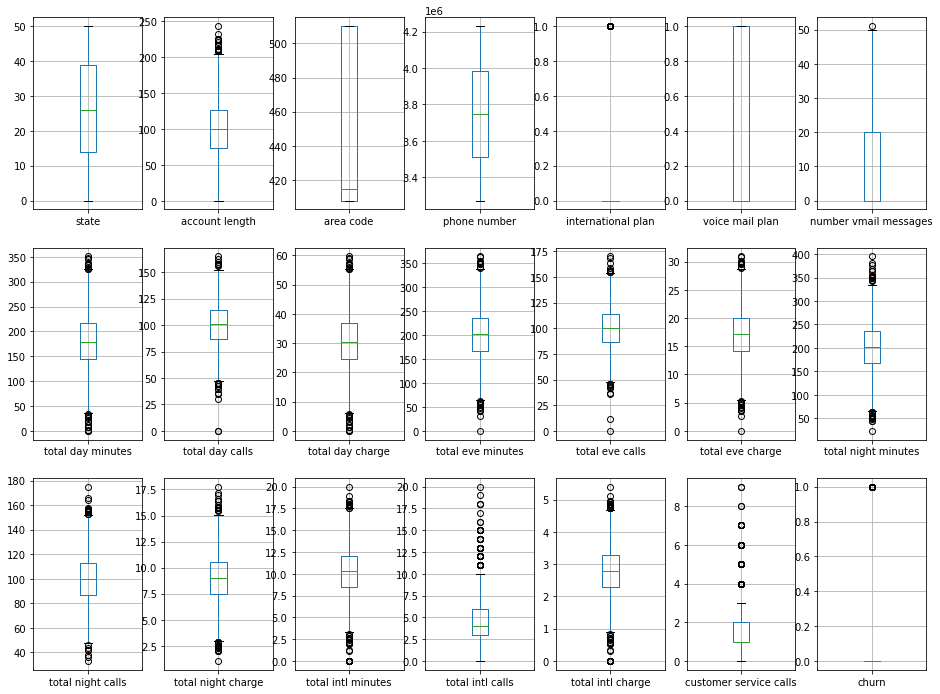

In [43]:
i = 0
fig = plt.figure(figsize=(16, 12))
for column in data.columns:
    ax = fig.add_subplot(3, 7, i + 1)
    data.boxplot(column=[column])
    i += 1

In [44]:
#стоит проверить на выбросы признаки - 'account length', 'total night calls', 'total nigth charge', 
#                                      'total intl minutes', 'total intl charge', 'total day calls',
#                                      'total eve calls', 'total eve minutes', 'total eve charge', 'total night minutes'

suspicious_column = ['account length', 'total night calls', 'total night charge', 'total intl minutes'
                     , 'total intl charge', 'total day calls', 'total eve calls', 'total eve minutes'
                     , 'total eve charge', 'total night minutes']

for column in suspicious_column:
    for x in [column]:
        q75,q25 = np.percentile(data.loc[:,x],[75,25])
        intr_qr = q75-q25

        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)
        
        print('Column = ', column, '; Count_value (< min) = ', data.loc[data[x] < min,x].shape[0])
        data.loc[data[x] < min,x] = np.nan
        print('Column = ', column, '; Count_value (> max) = ', data.loc[data[x] > max,x].shape[0])
        data.loc[data[x] > max,x] = np.nan

Column =  account length ; Count_value (< min) =  0
Column =  account length ; Count_value (> max) =  18
Column =  total night calls ; Count_value (< min) =  7
Column =  total night calls ; Count_value (> max) =  15
Column =  total night charge ; Count_value (< min) =  15
Column =  total night charge ; Count_value (> max) =  15
Column =  total intl minutes ; Count_value (< min) =  32
Column =  total intl minutes ; Count_value (> max) =  14
Column =  total intl charge ; Count_value (< min) =  32
Column =  total intl charge ; Count_value (> max) =  17
Column =  total day calls ; Count_value (< min) =  15
Column =  total day calls ; Count_value (> max) =  8
Column =  total eve calls ; Count_value (< min) =  11
Column =  total eve calls ; Count_value (> max) =  9
Column =  total eve minutes ; Count_value (< min) =  14
Column =  total eve minutes ; Count_value (> max) =  10
Column =  total eve charge ; Count_value (< min) =  14
Column =  total eve charge ; Count_value (> max) =  10
Column =

In [45]:
data = data.dropna() #удалили выбросы

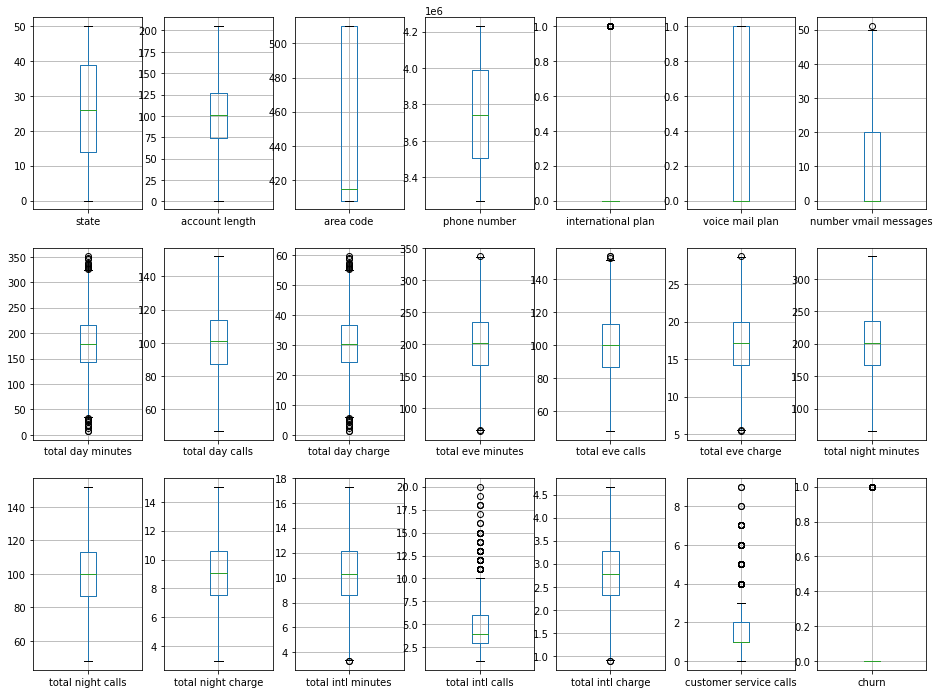

In [46]:
#посмотрим на коробки
i = 0
fig = plt.figure(figsize=(16, 12))
for column in data.columns:
    ax = fig.add_subplot(3, 7, i + 1)
    data.boxplot(column=[column])
    i += 1

In [47]:
print("Количество строк = ", data.shape[0])
#изначально было 3333

Количество строк =  3151


### Анализ

In [48]:
print("Количество строк = ", data.shape[0])
print("Количество столбцов = ", data.shape[1])

Количество строк =  3151
Количество столбцов =  21


<AxesSubplot:xlabel='churn', ylabel='count'>

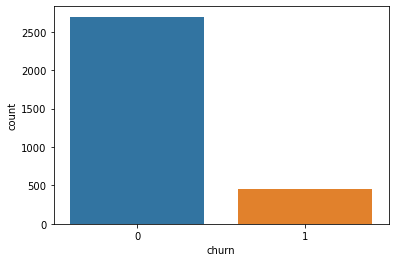

In [49]:
sns.countplot(x='churn', data=data)

In [50]:
#выборка не сбалансирована

In [51]:
#посмотрим на разброс признаков можно нормировать числовые признаки (бинарные не трогаем)
#data.describe()

<AxesSubplot:>

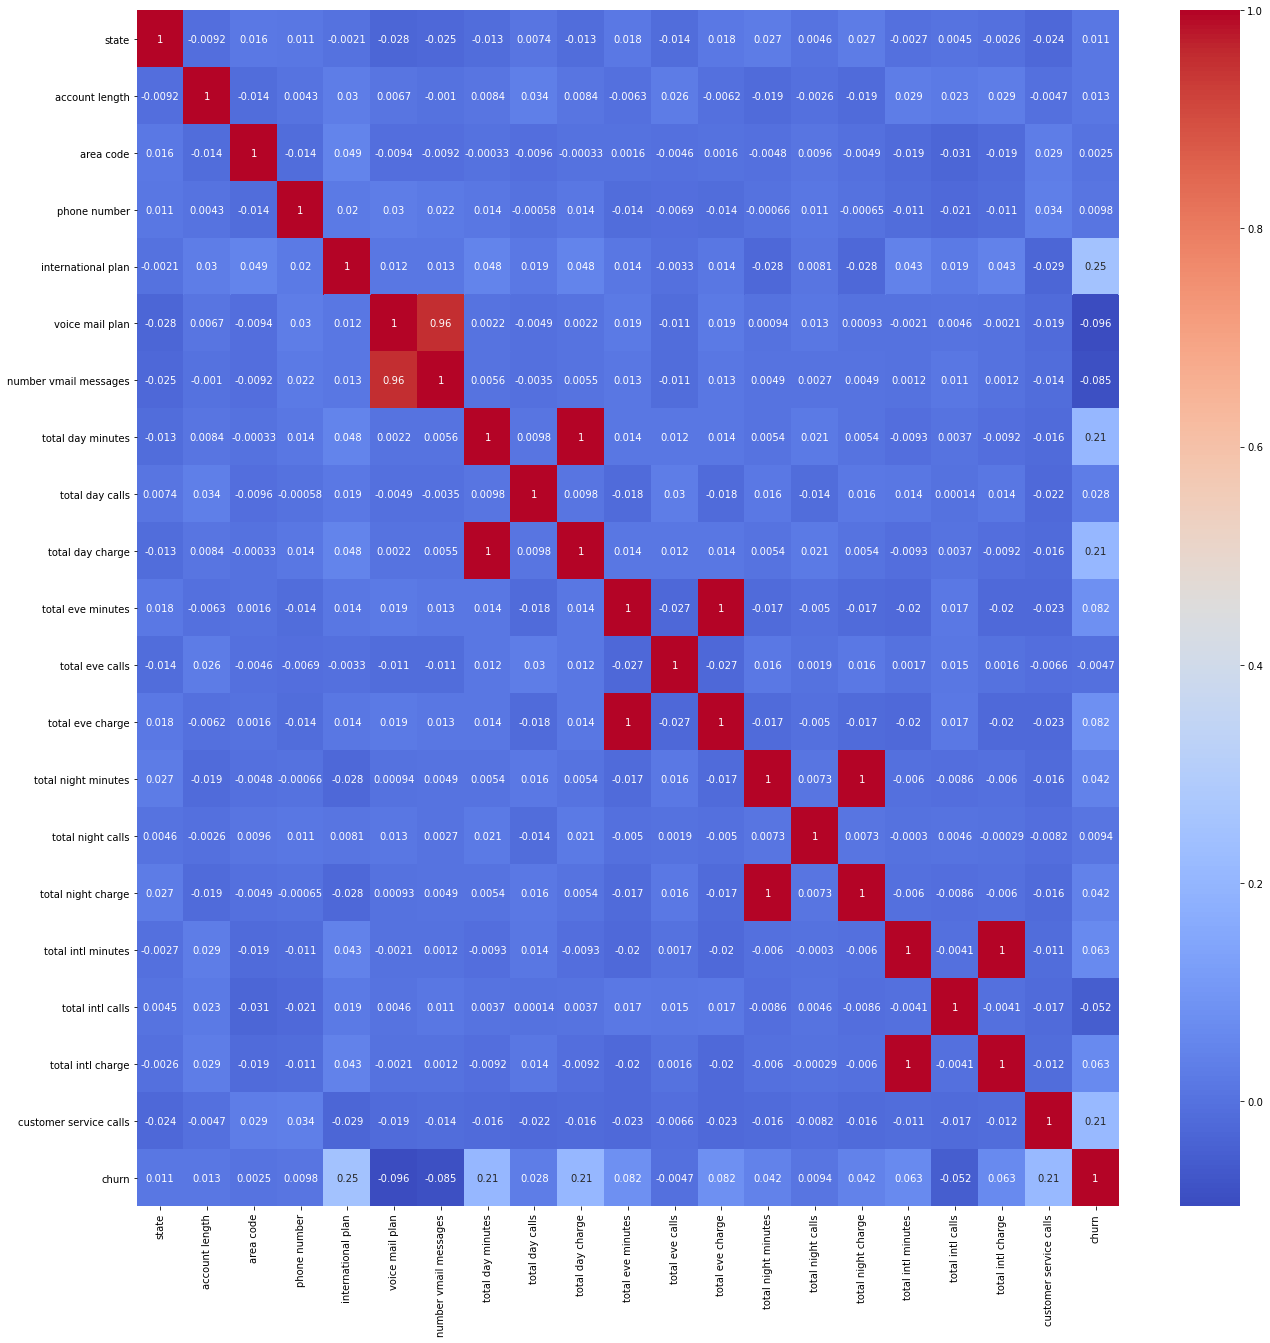

In [52]:
#посмотрим на зависимость признаков
plt.figure(figsize = (22,22))
sns.heatmap(data.corr(), cmap = 'coolwarm', annot=True)

Не сильно влияют на целевой признак признаки (< |0.01|):
- area code
- phone number
- total eve calls
- total night calls

Наиболее сильно влияют на целевой признак признаки (> |0.2|):
- international plan
- total day minutes
- total day charge
- customer service calls

### Энтропия

In [53]:
entropy = lambda data:-reduce(
    lambda x,y:x+y,
    map( 
        lambda x:(x/len(data))*math.log2(x/len(data)),#Вычисляем P(E)log2(P(E))
        data.iloc[:,-1].value_counts()
    )
)
    
print(entropy(data))

0.5956434409437703


### Дерево с индексом Джини

In [54]:
import numpy as np

class Node: #узел
    def __init__(self, predicted_class): #узел в себе хранит
        self.predicted_class = predicted_class #предсказанный класс
        self.feature_index = 0 #номер признака
        self.threshold = 0 #порог
        self.left = None #левый потомок
        self.right = None #правый потомок


class MyDecisionTreeClassifier:
    def __init__(self, max_depth=None): #инициализация
        self.max_depth = max_depth

    def fit(self, X, y): #обучение дерева
        self.n_classes_ = len(set(y)) #количество классов
        self.n_features_ = X.shape[1] #количество признаков
        self.tree_ = self._grow_tree(X, y) #построение дерева

    def predict(self, X):
        return [self._predict(inputs) for inputs in X]
    
#################################################################################################    
#best_idx: индекс признака для лучшего разделения или None, если разделение не найдено.
#best_thr: пороговое значение, используемое для разделения, или None, если разделение не найдено.    
################################################################################################# 
    def _best_split(self, X, y): #лучшее разделение выборки
        m = y.size #размер целевого признака
        if m <= 1: #в узле должно быть минимум 2 объекта
            return None, None
        num_parent = [np.sum(y == c) for c in range(self.n_classes_)] #количество каждого класса в узле
        best_gini = 1.0 - sum((n / m) ** 2 for n in num_parent) #индекс джини для текущего узла
        best_idx, best_thr = None, None
        for idx in range(self.n_features_): #просмотрим все признаки
            thresholds, classes = zip(*sorted(zip(X[:, idx], y))) #сортируем данные по объекту (выход - пороги и классы)
            num_left = [0] * self.n_classes_ #будем считать количество каждого из классов в потомках (левый потомок - нули)
            num_right = num_parent.copy() #скопировали данные о классах в родителе в правого потока 
            for i in range(1, m):
                c = classes[i - 1]
                num_left[c] += 1 #изменили соотношение классов в потомках (перебираем возможные разделения)
                num_right[c] -= 1
                #считаем индекс джини в потомках
                gini_left = 1.0 - sum(
                    (num_left[x] / i) ** 2 for x in range(self.n_classes_)
                )
                gini_right = 1.0 - sum(
                    (num_right[x] / (m - i)) ** 2 for x in range(self.n_classes_)
                )
                gini = (i * gini_left + (m - i) * gini_right) / m #общий индекс джини по потомкам
                if thresholds[i] == thresholds[i - 1]: #если порог не изменился, то меняем дальше 
                                                       #(тк две точки с одним классом должны быть по одну сторону от порога)
                    continue
                if gini < best_gini: #если порог изменился, то пересматриваем лучший индекс джини
                    best_gini = gini
                    best_idx = idx
                    best_thr = (thresholds[i] + thresholds[i - 1]) / 2
        return best_idx, best_thr

    def _grow_tree(self, X, y, depth=0): #рекурсивно строим дерево, находя наилучшее разделение
        num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes_)] #количество различных классов
        predicted_class = np.argmax(num_samples_per_class) #предсказанный класс - самый популярный класс 
        node = Node(predicted_class=predicted_class) #создаем узел с предсказанным классом
        if depth < self.max_depth: #разбиваем рекурсивно, пока не будет достигнута максимальная глубина
            idx, thr = self._best_split(X, y) #ищем лучшее разделение текущей выборки
            if idx is not None: #если найден лучший признак для разбиения
                indices_left = X[:, idx] < thr #левое разбиение
                X_left, y_left = X[indices_left], y[indices_left] #признаки и целевые признаки левой части
                X_right, y_right = X[~indices_left], y[~indices_left] #аналогично для правой части
                node.feature_index = idx #заполняем значения узла
                node.threshold = thr
                node.left = self._grow_tree(X_left, y_left, depth + 1)
                node.right = self._grow_tree(X_right, y_right, depth + 1)
        return node

    def _predict(self, inputs): #предсказание = рекурсивный проход по дереву до нужного листа
        node = self.tree_
        while node.left:
            if inputs[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.predicted_class

In [57]:
X = data.drop('churn', axis=1)
y = data['churn']
#разбили выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [58]:
start_time = time.time()

clf = MyDecisionTreeClassifier(max_depth=5)
clf.fit(np.array(X_train), np.array(y_train))

print(time.time() - start_time, "seconds")

1.8194587230682373 seconds


Дерево обучилось за 1.82 секунды

тренировочная выборка - 20%

тестовая выборка - 80%

In [59]:
#Посмотрим на точность предсказаний
start_time = time.time()
predict_test = clf.predict(np.array(X_test))
print(time.time() - start_time, "seconds")

0.0037767887115478516 seconds


Предсказания были получены за 0.0038 секунд

In [233]:
#выведем в таблицу истинное значение целевого признака и предсказанного
y_predict = pd.array(predict_test)
y_true_predict = pd.DataFrame({'y_true':y_test, 'y_predict':y_predict})
y_true_predict

,y_true,y_predict
29,0,0
49,0,0
57,1,0
3302,0,0
871,1,1
...,...,...
2674,0,0
2960,1,1
528,0,0
1958,0,0


In [234]:
#подсчитаем количество совпадений и промахов
cnt_true = 0
cnt_false = 0

for i in range(len(y_true_predict)):
    if (y_true_predict.iloc[i][0] == y_true_predict.iloc[i][1]):
        cnt_true +=1
    else:
        cnt_false +=1
        
print("Корректно классифицировано = ", cnt_true)
print("Ошибочно классифицировано = ", cnt_false)

Корректно классифицировано =  599
Ошибочно классифицировано =  32


In [235]:
#подсчитаем метрики качества

def get_metrics (y_true, y_predict):    
    TP = 0
    TN = 0
    FP = 0
    FN = 0

    for i in range(len(y_true)):
        if (y_true[i] == y_predict[i]):
            if(y_predict[i] == 1):
                TP += 1
            else:
                TN += 1
        else:
            if(y_true[i] == 1):
                FP += 1
            else:
                FN += 1
                
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    F1 = 2 * (precision * recall) / (precision + recall)
    #print ('TP =', TP, '; TN =', TN, '; FP =', FP, '; FN =', FN)
    #print ('accuracy =', accuracy)
    #print ('precision =', precision)
    #print ('recall =', recall)
    #print ('F1 =', F1)
    
    return accuracy, precision, recall, F1
    
get_metrics(np.array(y_test), predict_test)

(0.9492868462757528,
 0.7613636363636364,
 0.8589743589743589,
 0.8072289156626505)

In [236]:
#построим зависимость F1 от глубины дерева
depth = np.arange(2, 11)
F1 = []
for d in depth:
    dtc = MyDecisionTreeClassifier(max_depth=d)
    dtc.fit(np.array(X_train), np.array(y_train))
    
    y_predict = dtc.predict(np.array(X_test))
    _, _, _, f1 = get_metrics(np.array(y_test), y_predict)
    F1.append(f1)
F1

[0.5962732919254657,
 0.5882352941176471,
 0.6618705035971223,
 0.8072289156626505,
 0.7975460122699386,
 0.7654320987654323,
 0.7878787878787878,
 0.783132530120482,
 0.7804878048780488]

Text(0.5, 1.0, 'Зависимость F-меры от max_depth')

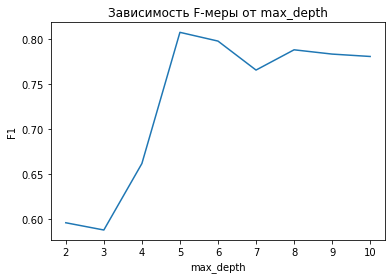

In [237]:
#построим график
plt.plot(depth, F1)
plt.xlabel('max_depth')
plt.ylabel('F1')
plt.title('Зависимость F-меры от max_depth')

### Decision tree

In [238]:
X = data.drop('churn', axis=1)
y = data['churn']

In [239]:
#разбили выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [61]:
start_time = time.time()

classifier = sklearn.tree.DecisionTreeClassifier(criterion='gini', max_depth=5)
classifier.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.022968053817749023 seconds ---


Библиотечное дерево обучилось за 0.023 секунд при глубине дерева = 5

In [62]:
start_time = time.time()

y_pred = classifier.predict(X_test)

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.003999471664428711 seconds ---


Предсказания получены за 0.004 секунды

In [63]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[519   8]
 [ 37  67]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       527
           1       0.89      0.64      0.75       104

    accuracy                           0.93       631
   macro avg       0.91      0.81      0.85       631
weighted avg       0.93      0.93      0.92       631



### Random Forest

In [247]:
clf = RandomForestClassifier(max_depth = 10, random_state = 0)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

#точность зависит от максимальной глубины дерева

[[529   6]
 [ 20  76]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       535
           1       0.93      0.79      0.85        96

    accuracy                           0.96       631
   macro avg       0.95      0.89      0.91       631
weighted avg       0.96      0.96      0.96       631



### Сравнение времени работы

In [4]:
d_time = {"Время обучения" : np.array([1.82, 0.023]), "Время предсказания" : np.array([0.0038,  0.004]), "F1" : np.array([0.807, 0.85])}
df_time = pd.DataFrame(d_time, index=['Своё дерево', 'Дерево sklearn'])
df_time

,Время обучения,Время предсказания,F1
Своё дерево,1.820,0.0038,0.807
Дерево sklearn,0.023,0.0040,0.850
